In [1]:
# PCA for data visualization example

# We will use the wine dataset: 
# https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset

# This dataset provides a categorization of 178 examples to 3 classes
# Each example has 13 attributes and the class

# Load the dataset
from sklearn.datasets import load_wine
winedata = load_wine()

# Load the X examples and the y classes
X, y = winedata['data'], winedata['target']
print(X.shape)
print(y.shape)


(178, 13)
(178,)


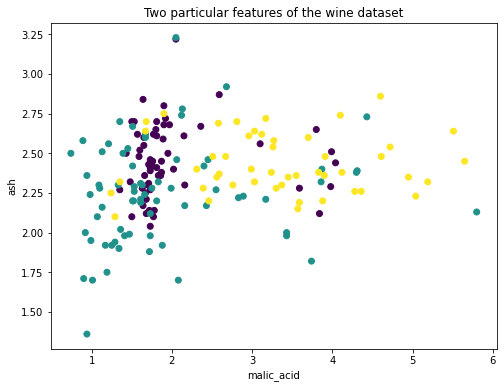

In [2]:
# It is hard to visualize the examples with all the features in space
# We can pick any two features and based on those, we can visualize the examples on a 2D plane,
# depicting also the class they belong to

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X[:,1], X[:,2], c=y)
plt.xlabel(winedata["feature_names"][1])
plt.ylabel(winedata["feature_names"][2])
plt.title("Two particular features of the wine dataset")
plt.show()
 

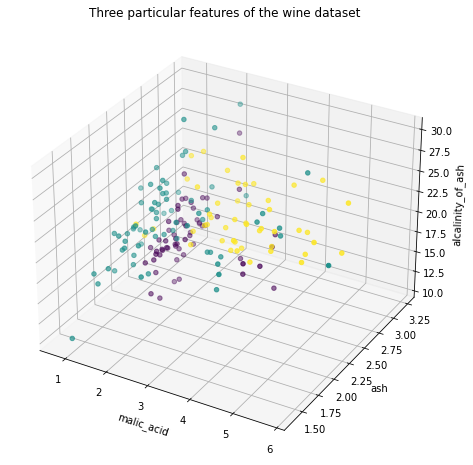

In [3]:
# Or, we can pick 3 features and based on those we can visualize the examples on 3D space

# Show any three features
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,1], X[:,2], X[:,3], c=y)
ax.set_xlabel(winedata["feature_names"][1])
ax.set_ylabel(winedata["feature_names"][2])
ax.set_zlabel(winedata["feature_names"][3])
ax.set_title("Three particular features of the wine dataset")
plt.show()

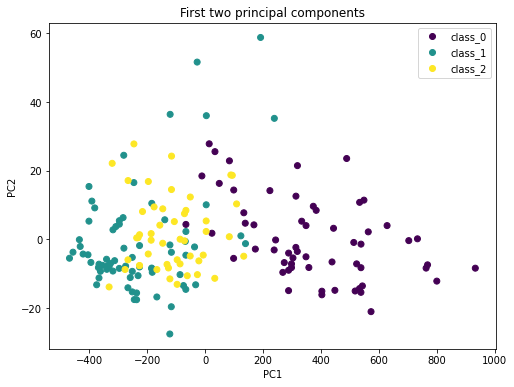

In [4]:
# The visualizations above do not show much regarding how the data look like.
# This is because they do not show all the features. They use 2 or 3 features that probably are not enough to
# separate the classes.

# Let's use PCA to show the first principal components that contain the largest amount of information
# and probably explain better the data

from sklearn.decomposition import PCA

# Show first two principal components without scaler
pca = PCA()
plt.figure(figsize=(8,6))
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components")
plt.show()

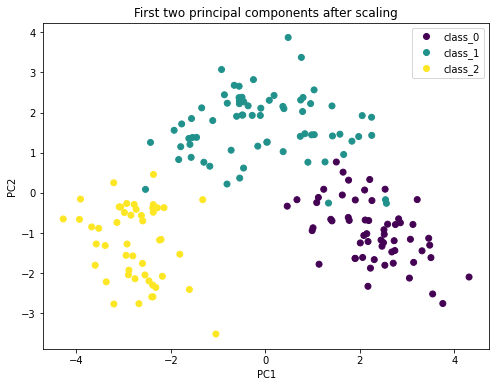

In [5]:
# We have transformed the input data X by PCA into Xt. 
# We consider only the first two columns, which contain the most information.
# I.e. Principal component 1 and Principal component 2, and plot it in 2D. 
# The purple class is quite distinctive, but there is still some overlap. 
# Let's scale the data before PCA, since PCA is sensitive to unnormalized data.

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Show first two principal components with scaler
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components after scaling")
plt.show()

In [6]:
# Based on this plot, we conclude that a simple machine learning algorithm 
# such as SVM can classify this dataset in high accuracy.

In [7]:
# PCA rearranges the features by their linear combinations. 
# Hence it is called a feature extraction technique. 
# One characteristic of PCA is that the first principal component 
# holds the most information about the dataset. 
# The second principal component is more informative than the third, and so on.

print(pca.components_)

[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]
 [-0.0178563   0.53689028 -0.21417556  0.06085941 -0.35179658  0.19806835
   0.15229479 -0.20330102  0.39905653  0.06592568 -0.42777141  0.18412074
  -0.23207086]
 [-0.26566365  0.03521363 -0.14302547  0.06610294  0.72704851 -0.14931841
  -0.10902584 -0.50070298  0.13685982 -0.07643678 -0.17361452 -0.10116099
  -0.1578688 ]
 [-0.21353865 -0.53681385 -0.15447466  0.10082451 -0.03814394  0.0841223
   0.01892002  0.25859401  0.53379539  0.41864414 -0.10598274 -0.26585107
  -0.11972557]
 [-0.05639636  0.420523

In [8]:
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


In [12]:
# What is the principal components role in terms of machine learning?

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from collections import Counter
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = SVC(kernel="linear", gamma='auto').fit(X_train, y_train)
print("Using all features, accuracy: ", clf.score(X_test, y_test))
print("Using all features, F1: ", f1_score(y_test, clf.predict(X_test), average="macro"))


steps = [('pca', PCA(n_components=1)), ('m', SVC(kernel="linear", gamma='auto'))]
clf = Pipeline(steps=steps)
clf.fit(X_train, y_train)
print("Using 1 principal component, accuracy: ", clf.score(X_test, y_test))
print("Using 1 principal component, F1: ", f1_score(y_test, clf.predict(X_test), average="macro"))


steps = [('pca', PCA(n_components=2)), ('m', SVC(kernel="linear", gamma='auto'))]
clf = Pipeline(steps=steps)
clf.fit(X_train, y_train)
print("Using 2 principal components, accuracy: ", clf.score(X_test, y_test))
print("Using 2 principal components, F1: ", f1_score(y_test, clf.predict(X_test), average="macro"))

steps = [('pca', PCA(n_components=3)), ('m', SVC(kernel="linear", gamma='auto'))]
clf = Pipeline(steps=steps)
clf.fit(X_train, y_train)
print("Using 3 principal components, accuracy: ", clf.score(X_test, y_test))
print("Using 3 principal components, F1: ", f1_score(y_test, clf.predict(X_test), average="macro"))


Using all features, accuracy:  0.9491525423728814
Using all features, F1:  0.9469005847953218
Using 1 principal component, accuracy:  0.576271186440678
Using 1 principal component, F1:  0.47509578544061304
Using 2 principal components, accuracy:  0.5932203389830508
Using 2 principal components, F1:  0.4980842911877395
Using 3 principal components, accuracy:  0.7457627118644068
Using 3 principal components, F1:  0.7455039584071842


In [13]:
# Example 2: Evaluate mode performance on a synthetic dataset

In [14]:
# We can use PCA to calculate a projection of a dataset and select a number of dimensions 
# or principal components of the projection to use as input to a model.

# In this example we will experiment with PCA and logistic regression.
# We will evaluate the performance of logistic regression on a synthetic dataset
# for various numbers of principal components.

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# Create a synthetic dataset 
# In our example we create a dataset with 1000 examples and 20 input features.
# That is, the dataset dimension is 20.
# Out of those 20, 15 are supposed to be informative ("meaningful").
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)

# Summarize the dataset
print(X.shape, y.shape)




(1000, 20) (1000,)


In [15]:
# Create a list of models to experiment with
# We will create 20 models. Each model will take as input a different number of principal components.
# (i.e., only one component as input, two components, three,...,twenty)

# We will define a function that creates and returns those models
def get_models():
    models = dict()
    for i in range(1,21):
        # This way we essentially define a two-step process:
        # Perform PCA and use the output of PCA as input to logistic regression
        steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

In [16]:
# Evaluate a given model using cross-validation

# We will create a function that given a model and a dataset X with y labels, 
# it evaluates the model in terms of accuracy
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>1 0.542 (0.048)
>2 0.713 (0.048)
>3 0.720 (0.053)
>4 0.723 (0.051)
>5 0.725 (0.052)
>6 0.730 (0.046)
>7 0.805 (0.036)
>8 0.800 (0.037)
>9 0.814 (0.036)
>10 0.816 (0.034)
>11 0.819 (0.035)
>12 0.819 (0.038)
>13 0.819 (0.035)
>14 0.853 (0.029)
>15 0.865 (0.027)
>16 0.865 (0.027)
>17 0.865 (0.027)
>18 0.865 (0.027)
>19 0.865 (0.027)
>20 0.865 (0.027)


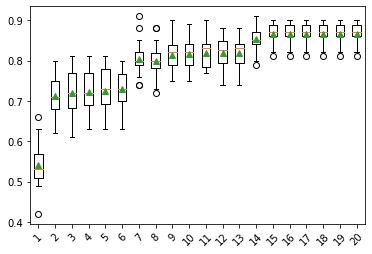

In [17]:
# Get the models
models = get_models()

# Evaluate the models and store results
results = []
names = []
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
# Plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

In [18]:
# We see a general trend of increased performance as the number of dimensions is increased. 
# On this dataset, the results suggest a trade-off in the number of dimensions vs. the classification accuracy 
# of the model.

# Interestingly, we don’t see any improvement beyond 15 components. 
# This matches our definition of the problem where only the first 15 components contain information 
# about the class and the remaining five are redundant.